# CAPSTONE PROJECT - EDA

imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sweetviz

positive outcomes definition

In [2]:
positive_outcomes = ['Community resolution',
'Khat or Cannabis warning',
'Caution (simple or conditional)',
'Arrest',
'Penalty Notice for Disorder',
'Summons / charged by post',
'Suspect arrested',
'Suspect summoned to court',
]

check data 

In [3]:
data = pd.read_csv('./data/train.csv')

In [4]:
data_origin = data.copy(deep=True)

In [5]:
data.head(5)

,observation_id,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station
0,2e4d0094-c30b-471b-a211-72a9790feca2,Person search,2020-12-01T01:10:00+00:00,NaN,50.798824,-1.089471,Male,25-34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Community resolution,False,False,hampshire
1,4779fbe8-6e05-4534-85fd-db32952ee309,Person search,2020-12-01T02:00:00+00:00,NaN,50.785099,-1.091540,Male,over 34,White - Any other White background,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,hampshire
2,cb5c685d-acac-42e2-914d-75e6ff73b0a8,Person search,2020-12-01T09:15:00+00:00,NaN,50.952006,-1.403341,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,True,hampshire
3,f486e116-5b1e-45db-9931-a7f070c5c478,Person search,2020-12-01T10:20:00+00:00,NaN,50.806383,-1.079844,Male,10-17,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False,hampshire
4,78f4020e-12cc-4889-bf1a-2f2c29b2f662,Person search,2020-12-01T10:24:00+00:00,NaN,50.806670,-1.081982,Male,10-17,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,hampshire


Converting to datetime

In [6]:
data.Date = pd.to_datetime(data.Date)

Counting entries and non-null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856610 entries, 0 to 856609
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype              
---  ------                                    --------------   -----              
 0   observation_id                            856610 non-null  object             
 1   Type                                      856610 non-null  object             
 2   Date                                      856610 non-null  datetime64[ns, UTC]
 3   Part of a policing operation              646620 non-null  object             
 4   Latitude                                  700308 non-null  float64            
 5   Longitude                                 700308 non-null  float64            
 6   Gender                                    856610 non-null  object             
 7   Age range                                 856610 non-null  object             
 8   Self-defined ethnicity                    84

Getting a list of self-defined etnicities and officer defined

In [8]:
data['Self-defined ethnicity'].unique()

array(['Other ethnic group - Not stated',
       'White - Any other White background',
       'White - English/Welsh/Scottish/Northern Irish/British',
       'Mixed/Multiple ethnic groups - White and Black African',
       'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background',
       'Black/African/Caribbean/Black British - Caribbean',
       'Asian/Asian British - Any other Asian background',
       'Asian/Asian British - Indian',
       'Asian/Asian British - Bangladeshi',
       'Black/African/Caribbean/Black British - African', 'White - Irish',
       'Other ethnic group - Any other ethnic group',
       'Mixed/Multiple ethnic groups - White and Asian',
       'Asian/Asian British - Chinese',
       'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background',
       'Mixed/Multiple ethnic groups - White and Black Caribbean',
       'Asian/Asian British - Pakistani',
       'White - Gypsy or Irish Traveller', nan,
       'Other ethnic

In [9]:
data['Officer-defined ethnicity'].unique()

array(['White', 'Other', 'Asian', 'Black', 'Mixed'], dtype=object)

aggregate self defined into the same categories as officer defined

In [10]:
self_defined_agregation = {
    'White': [
        'White - Any other White background',
        'White - English/Welsh/Scottish/Northern Irish/British',
        'White - Gypsy or Irish Traveller',
        'White - Irish',
    ],
    'Other': [
        'Other ethnic group - Not stated',
        'Other ethnic group - Any other ethnic group',
        'Other ethnic group - Arab',

    ],
    'Asian': [
        'Asian/Asian British - Any other Asian background',
        'Asian/Asian British - Bangladeshi',
        'Asian/Asian British - Chinese',
        'Asian/Asian British - Indian',
        'Asian/Asian British - Pakistani',
    ],
    'Black': [
        'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background',
        'Black/African/Caribbean/Black British - Caribbean',
        'Black/African/Caribbean/Black British - African',
    ],
    'Mixed': [
        'Mixed/Multiple ethnic groups - White and Black African',
        'Mixed/Multiple ethnic groups - White and Asian',
        'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background',
        'Mixed/Multiple ethnic groups - White and Black Caribbean',
    ]
}


In [11]:
inv_self_defined_agregation = {value: key for key, values in self_defined_agregation.items() for value in values}

In [12]:
inv_self_defined_agregation

{'White - Any other White background': 'White',
 'White - English/Welsh/Scottish/Northern Irish/British': 'White',
 'White - Gypsy or Irish Traveller': 'White',
 'White - Irish': 'White',
 'Other ethnic group - Not stated': 'Other',
 'Other ethnic group - Any other ethnic group': 'Other',
 'Other ethnic group - Arab': 'Other',
 'Asian/Asian British - Any other Asian background': 'Asian',
 'Asian/Asian British - Bangladeshi': 'Asian',
 'Asian/Asian British - Chinese': 'Asian',
 'Asian/Asian British - Indian': 'Asian',
 'Asian/Asian British - Pakistani': 'Asian',
 'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background': 'Black',
 'Black/African/Caribbean/Black British - Caribbean': 'Black',
 'Black/African/Caribbean/Black British - African': 'Black',
 'Mixed/Multiple ethnic groups - White and Black African': 'Mixed',
 'Mixed/Multiple ethnic groups - White and Asian': 'Mixed',
 'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background': 'Mix

In [13]:
data['self_defined_agg'] = data['Self-defined ethnicity'].apply(lambda x: inv_self_defined_agregation.get(x))

Fixing Outcome linked to object of search null values

In [14]:
data['Outcome linked to object of search'] = data['Outcome linked to object of search'].fillna(False)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856610 entries, 0 to 856609
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype              
---  ------                                    --------------   -----              
 0   observation_id                            856610 non-null  object             
 1   Type                                      856610 non-null  object             
 2   Date                                      856610 non-null  datetime64[ns, UTC]
 3   Part of a policing operation              646620 non-null  object             
 4   Latitude                                  700308 non-null  float64            
 5   Longitude                                 700308 non-null  float64            
 6   Gender                                    856610 non-null  object             
 7   Age range                                 856610 non-null  object             
 8   Self-defined ethnicity                    84

Exploring possible outcome values

In [16]:
pd.Series(data.Outcome.unique())

0               Community resolution
1       A no further action disposal
2                             Arrest
3          Summons / charged by post
4    Caution (simple or conditional)
5        Penalty Notice for Disorder
6           Khat or Cannabis warning
dtype: object

In [17]:
data.groupby(['Outcome', 
            'Outcome linked to object of search'])['observation_id'].count().unstack()

Outcome linked to object of search,False,True
Outcome,,
A no further action disposal,582321,45153
Arrest,80876,30872
Caution (simple or conditional),994,2265
Community resolution,48140,20140
Khat or Cannabis warning,2417,9279
Penalty Notice for Disorder,16084,1235
Summons / charged by post,10218,6616


In [18]:
data['positive_outcomes'] = data['Outcome'].apply(lambda val: True if val in positive_outcomes else False)

In [19]:
data.groupby(['positive_outcomes', 
            'Outcome linked to object of search'])['observation_id'].count().unstack()

Outcome linked to object of search,False,True
positive_outcomes,,
False,582321,45153
True,158729,70407


check what stations have positive_outcomes=False and Outcome linked to object of search	= True

In [20]:
percent_data_false_outcomes_linked = (data.loc[(data['Outcome linked to object of search']) & (~data['positive_outcomes']), 'station'].value_counts()/data.station.value_counts()).fillna(0).sort_values(ascending=False)

<AxesSubplot:title={'center':'Outcomes linked to objective of search when outcome is negative'}, xlabel='Station name', ylabel='Percentage of negative outcomes linked to objective of search'>

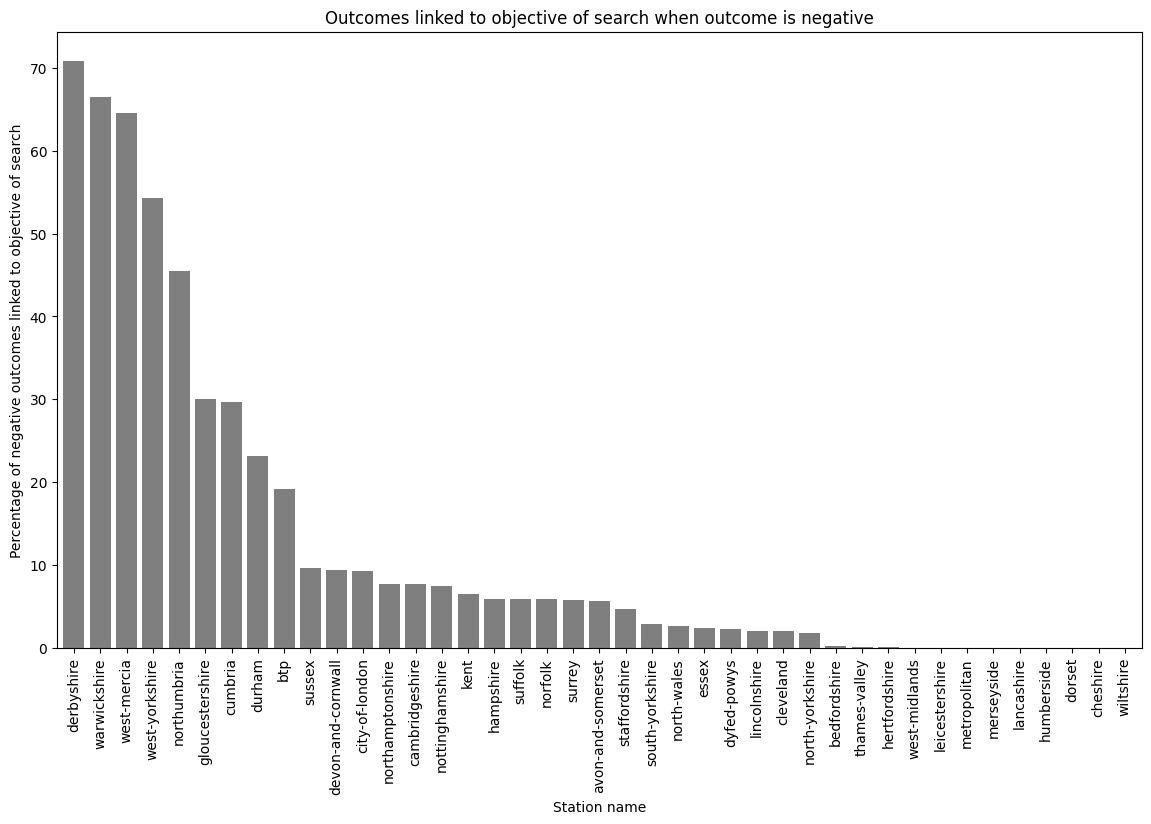

In [21]:
(100*percent_data_false_outcomes_linked).plot(kind='bar', color='black', figsize=(14,8), alpha=0.5, width=0.8, xlabel='Station name', ylabel='Percentage of negative outcomes linked to objective of search', title='Outcomes linked to objective of search when outcome is negative')

Replace values Outcome linked to object of search True=>False (positive_outcomes=False and Outcome linked to object of search=True) values from the dataset, since it's data entry errors 

In [22]:
# data = data.loc[~((data['Outcome linked to object of search']) & (~data['positive_outcomes']))]

In [23]:
data.loc[((data['Outcome linked to object of search']) & (~data['positive_outcomes'])), 'Outcome linked to object of search'] = False

In [24]:
data.groupby(['positive_outcomes', 
            'Outcome linked to object of search'])['observation_id'].count().unstack()

Outcome linked to object of search,False,True
positive_outcomes,,
False,627474.0,NaN
True,158729.0,70407.0


create basic EDA

                                             |          | [  0%]   00:00 -> (? left)


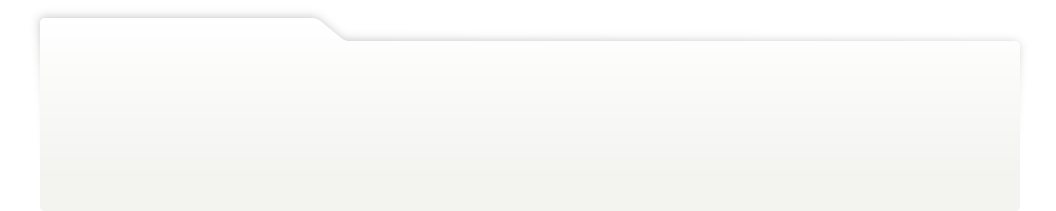
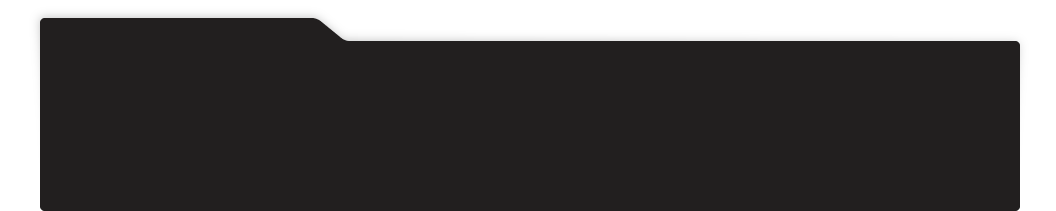
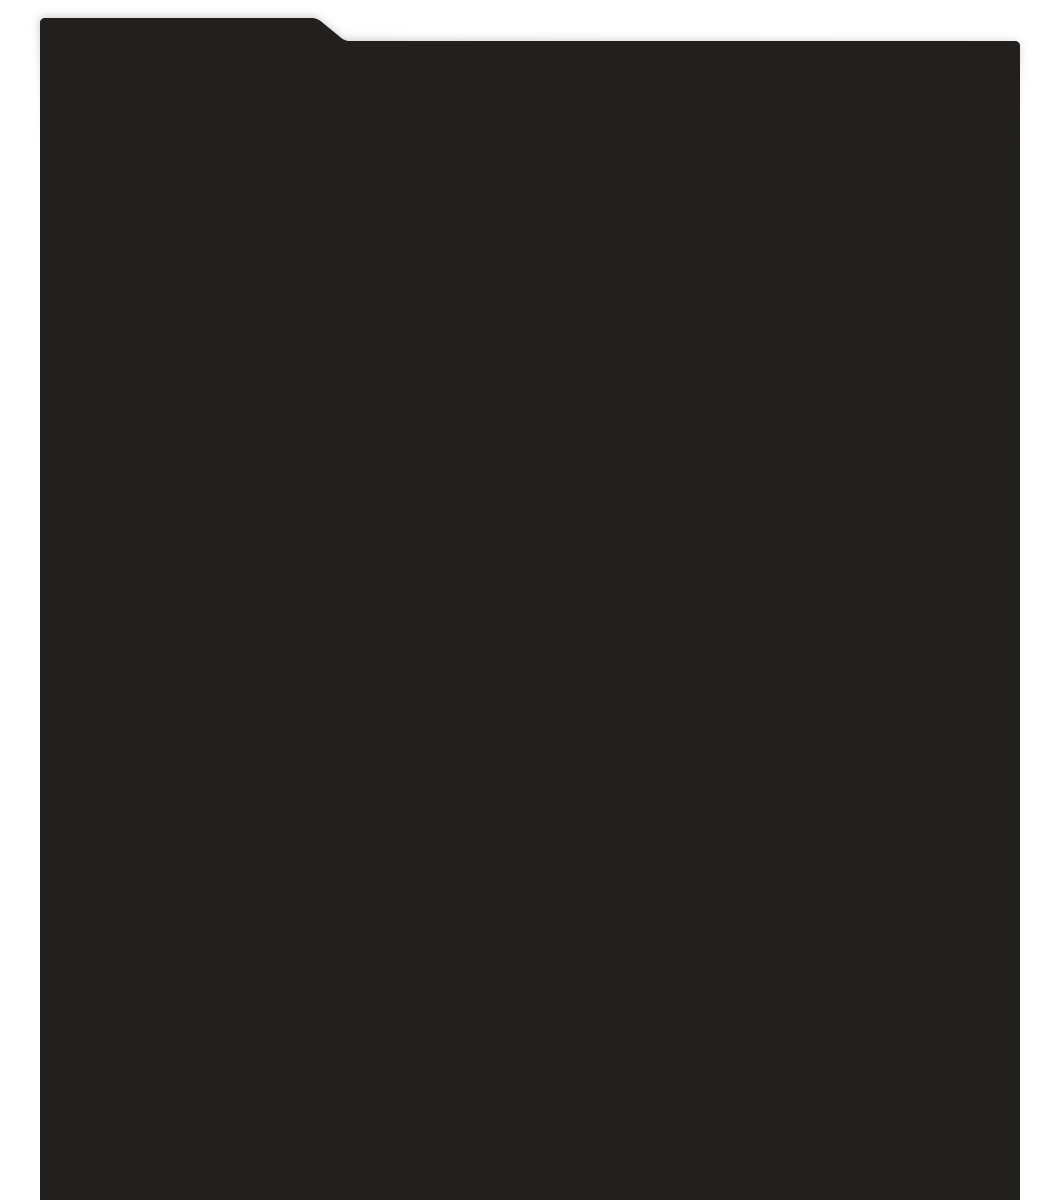
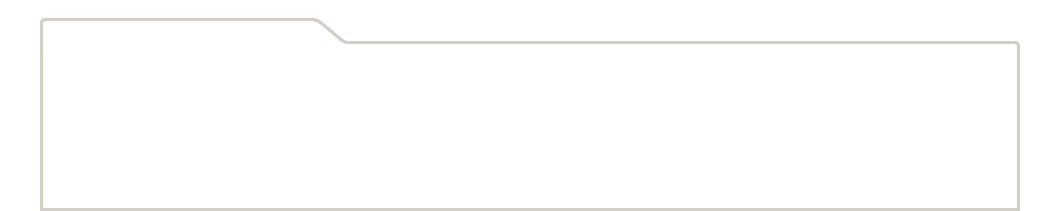
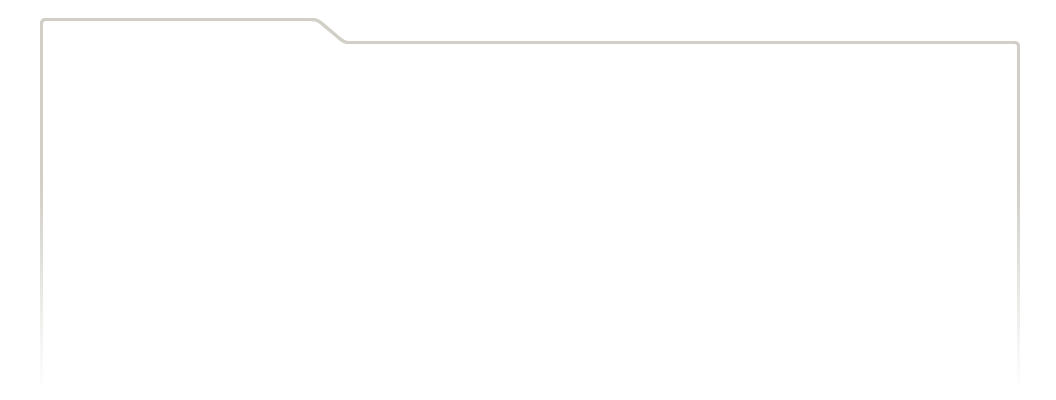
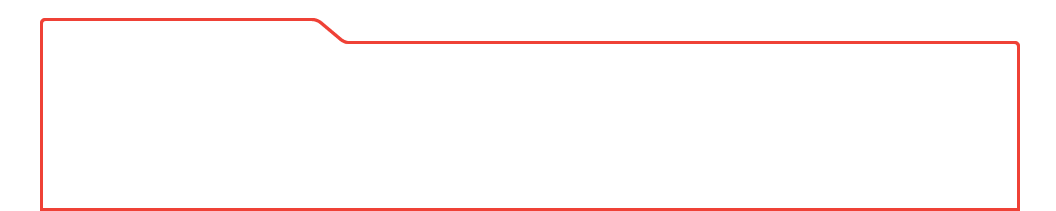
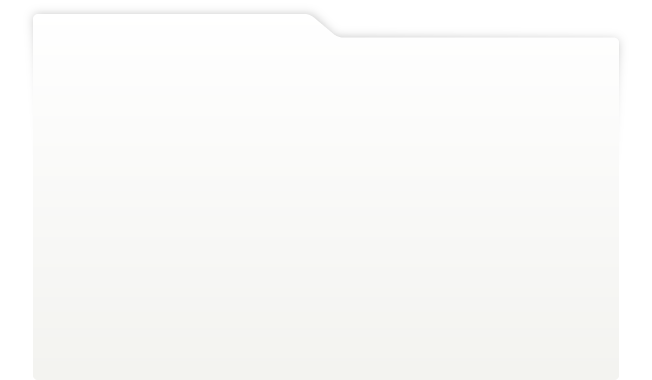
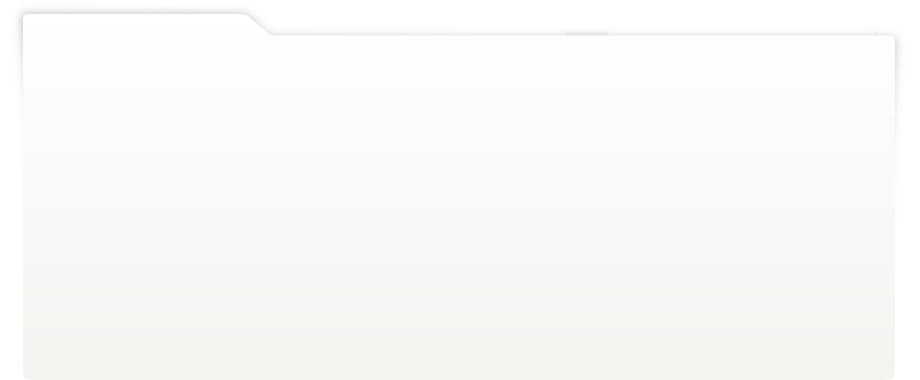
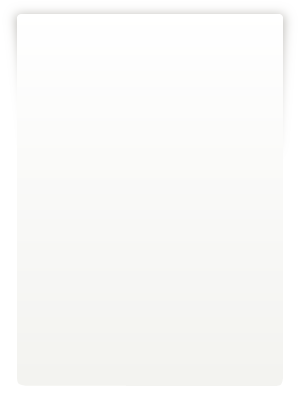
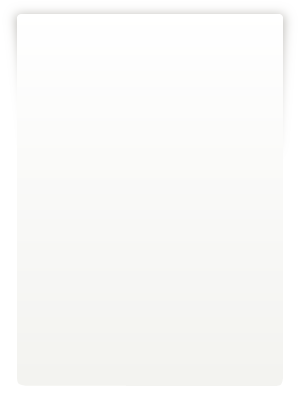
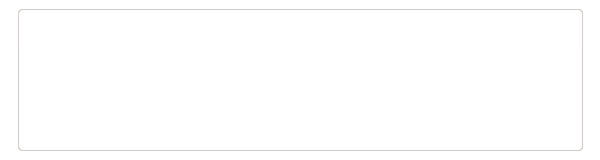
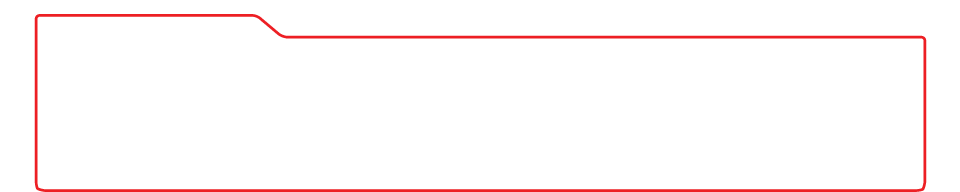
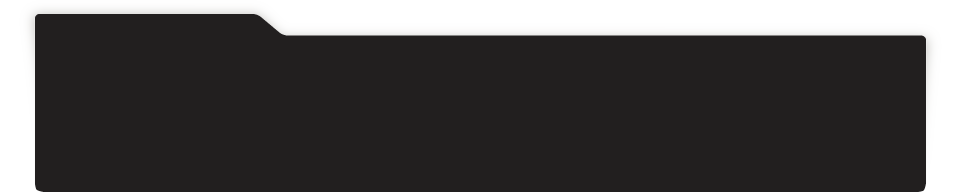
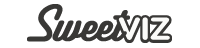
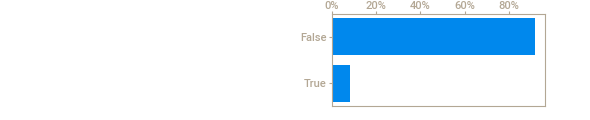
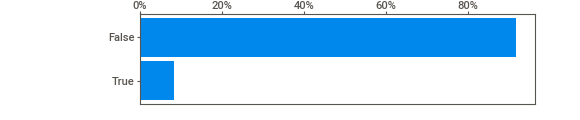
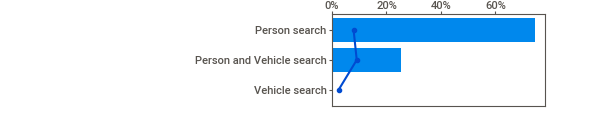
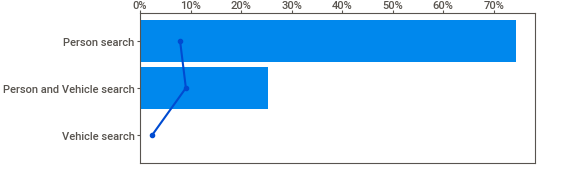
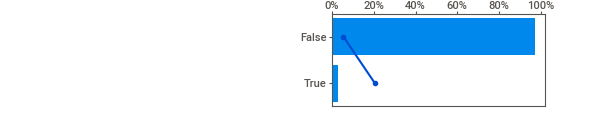
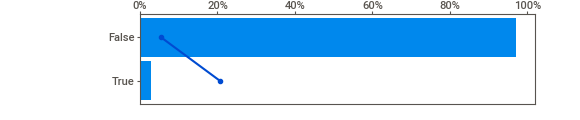
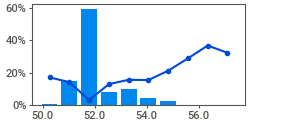
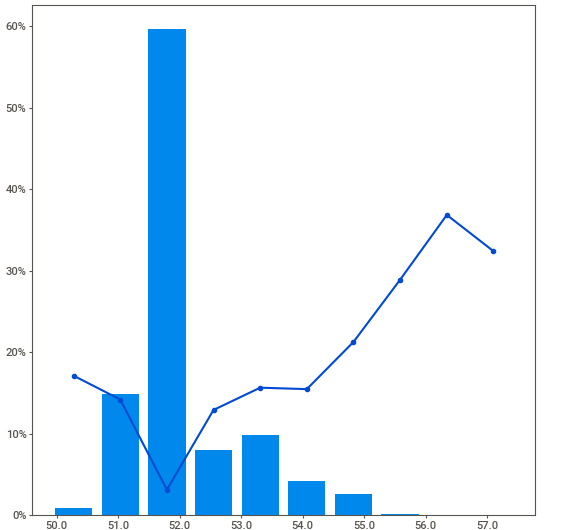
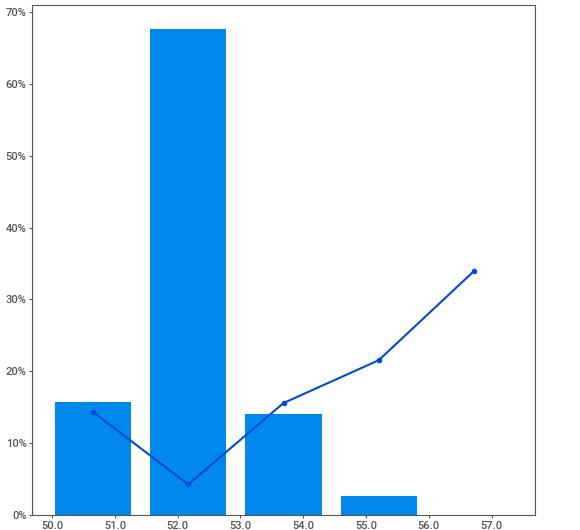
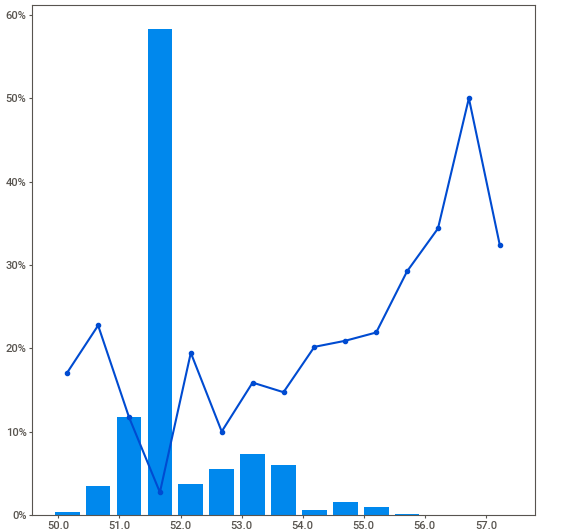
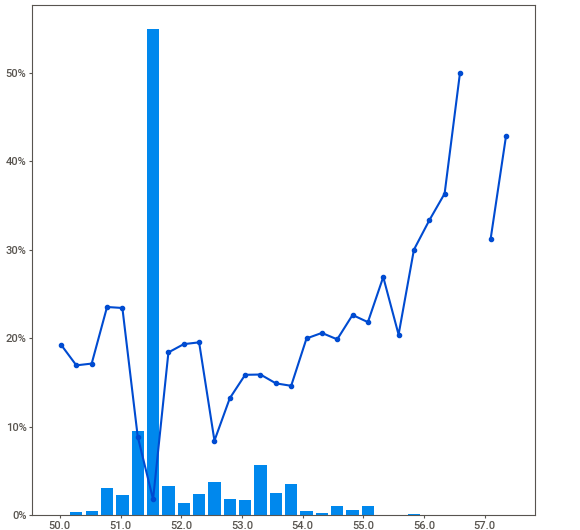
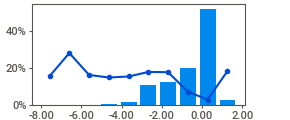
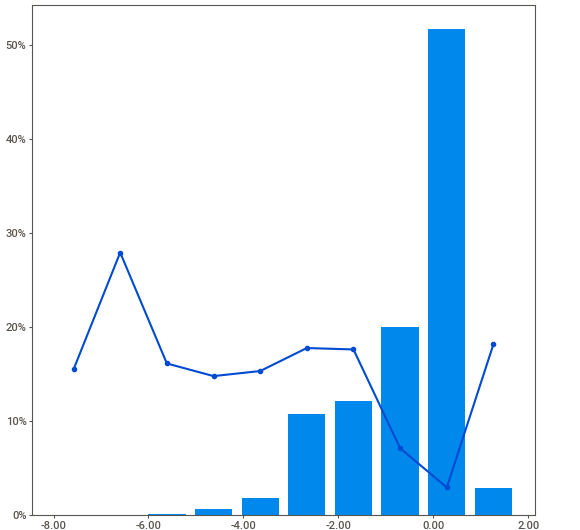
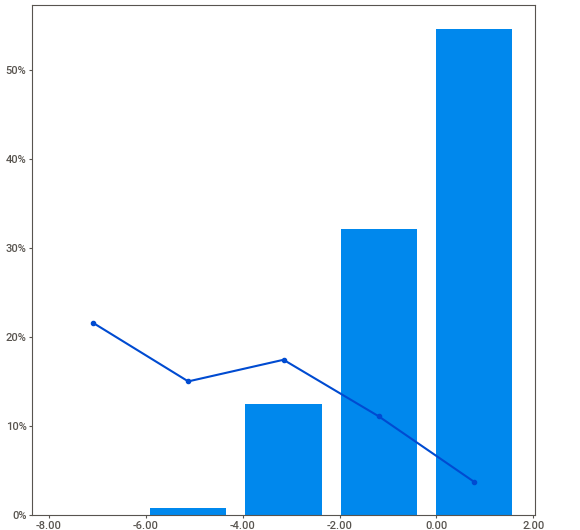
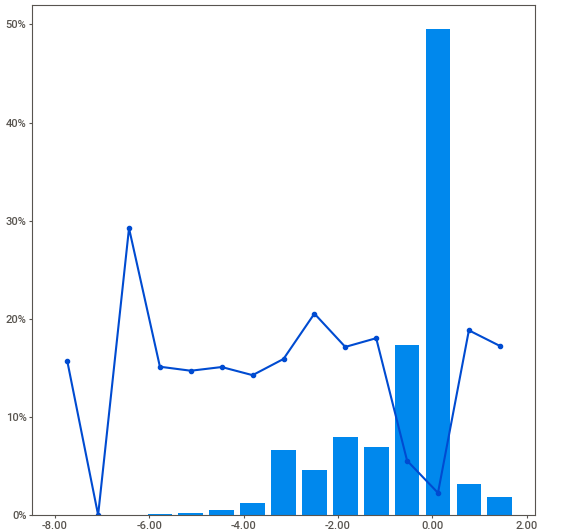
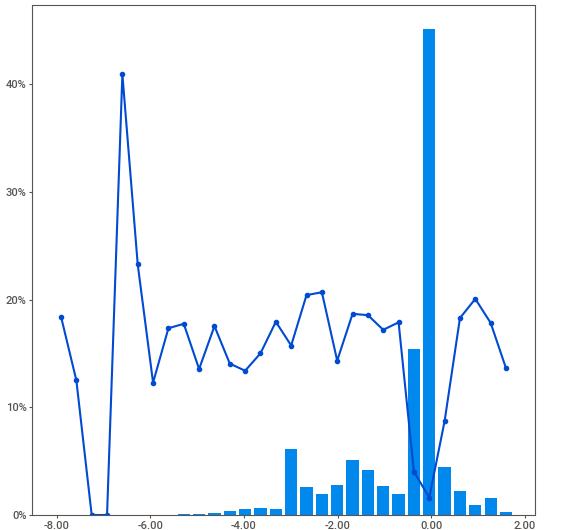
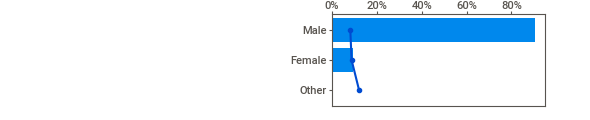
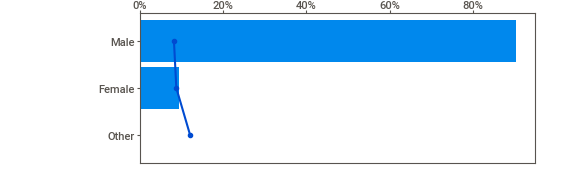
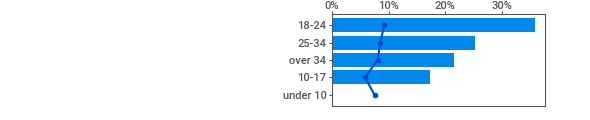
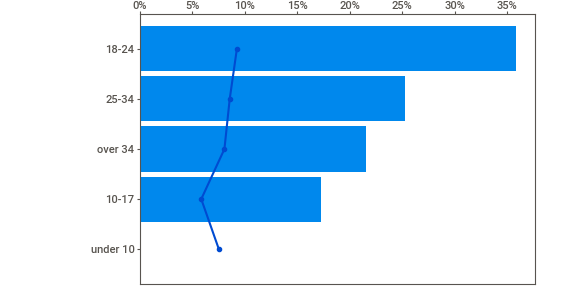
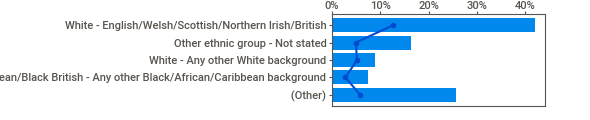
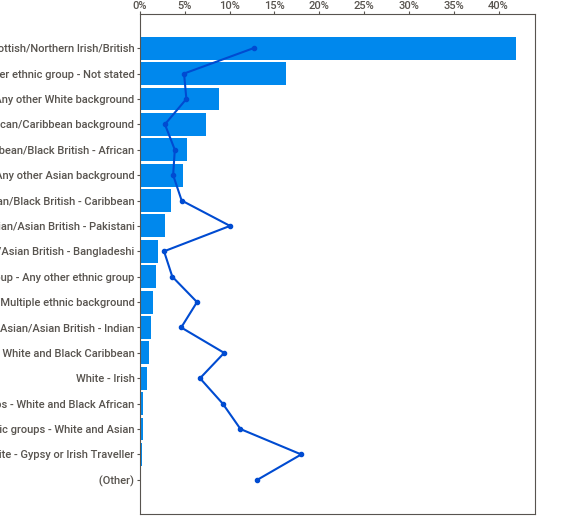
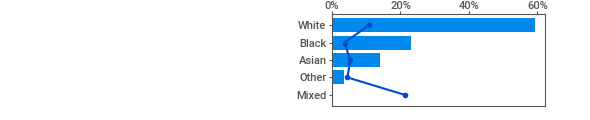
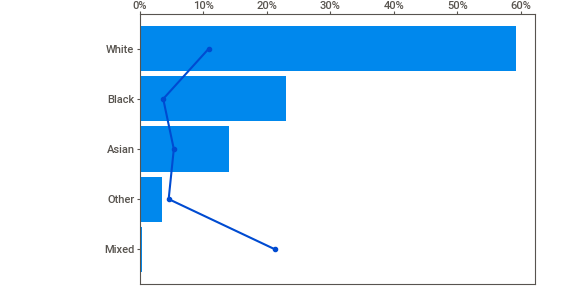
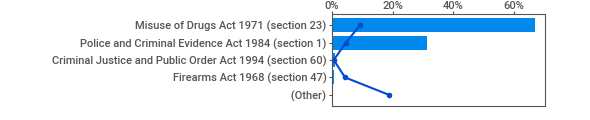
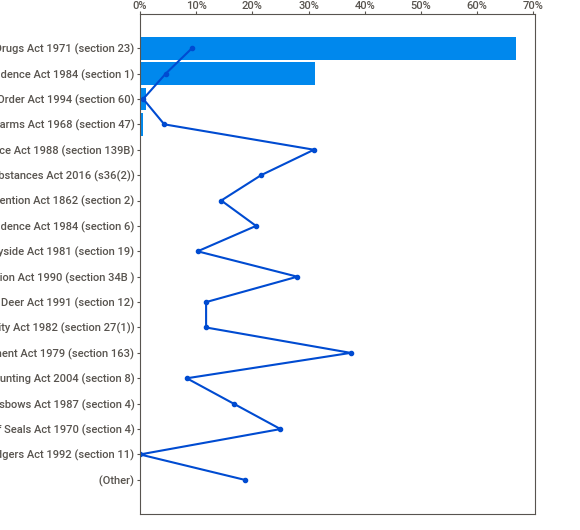
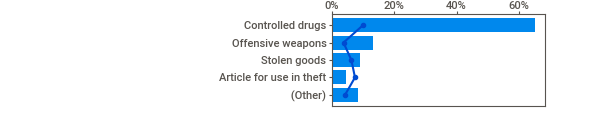
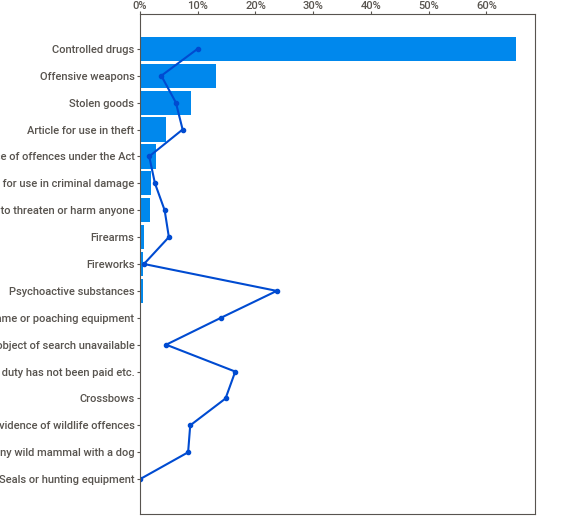
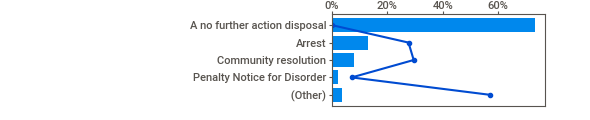
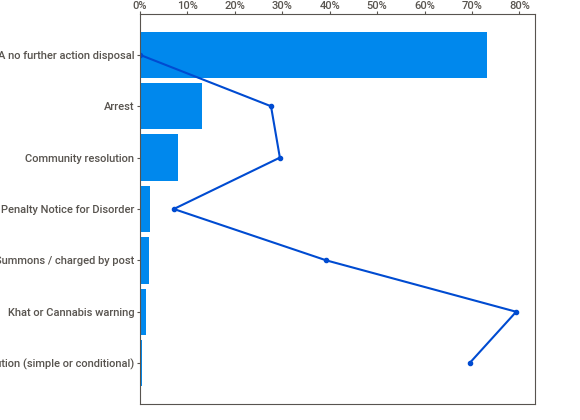
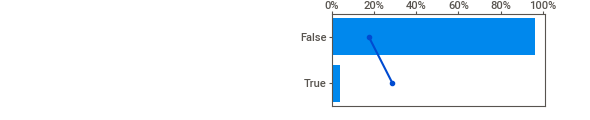
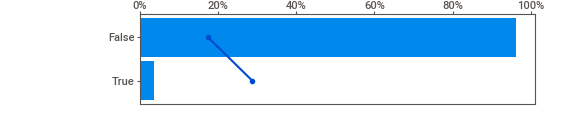
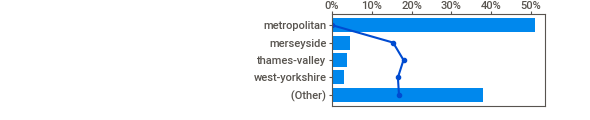
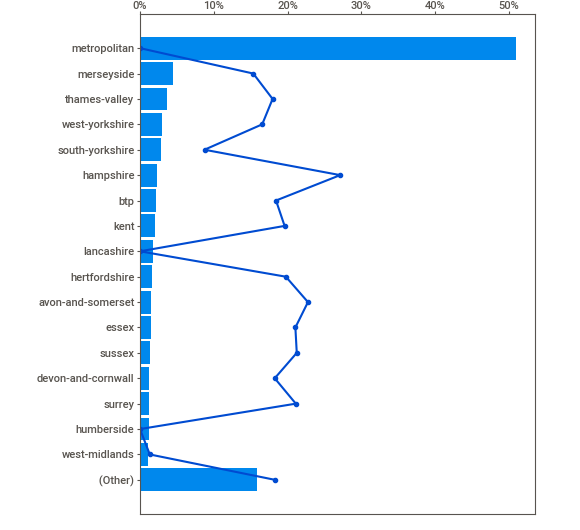
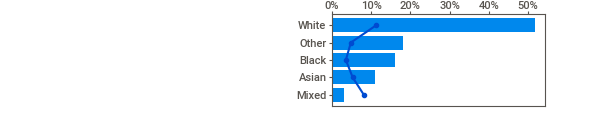
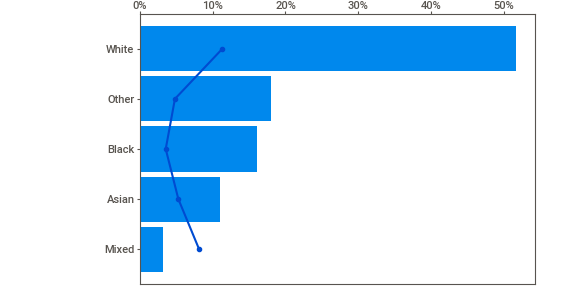
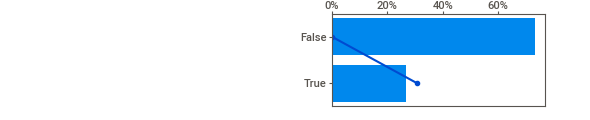
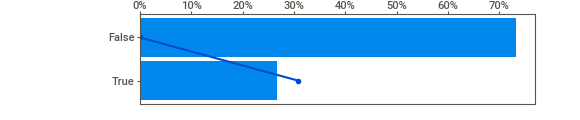
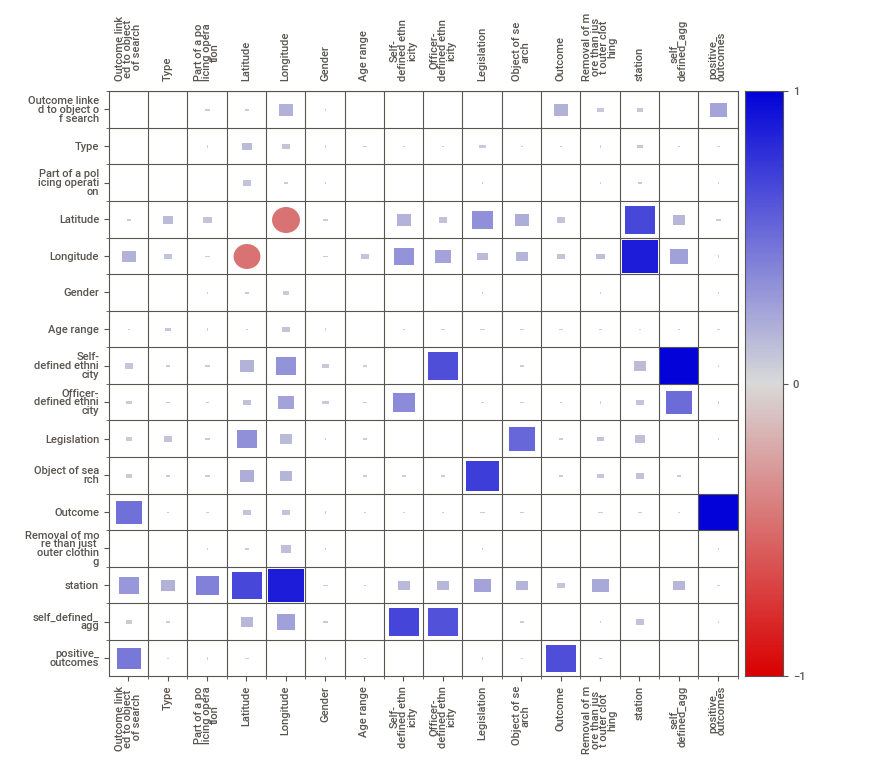
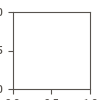

In [25]:
sweetviz.DataframeReport(data, target_feature_name='Outcome linked to object of search').show_notebook()

<AxesSubplot:title={'center':'Number of search operations per week'}, xlabel='Date', ylabel='Number of search operations'>

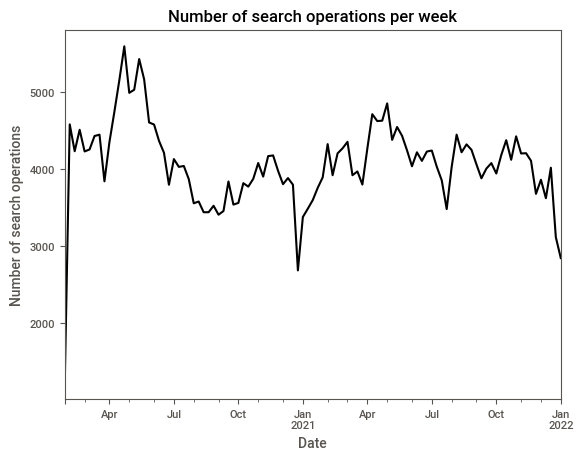

In [26]:
data.groupby('Date')['observation_id'].count().groupby(pd.Grouper(freq='W')).count().plot(kind='line', x='Date', y='observation_id', color='black', ylabel='Number of search operations', title='Number of search operations per week')

In [27]:
data.groupby(['Removal of more than just outer clothing', 'Age range', 'Type', ])['observation_id'].count()

Removal of more than just outer clothing  Age range  Type                     
False                                     10-17      Person and Vehicle search     8707
                                                     Person search                51582
                                                     Vehicle search                  10
                                          18-24      Person and Vehicle search    33584
                                                     Person search                76931
                                                     Vehicle search                  39
                                          25-34      Person and Vehicle search    25566
                                                     Person search                54626
                                                     Vehicle search                  45
                                          over 34    Person and Vehicle search    18460
                                         

self defined vs office defined ethnicities

In [28]:
data['Officer-defined ethnicity']

0         White
1         Other
2         White
3         White
4         Asian
          ...  
856605    White
856606    Other
856607    White
856608    White
856609    White
Name: Officer-defined ethnicity, Length: 856610, dtype: object

In [29]:
data.self_defined_agg

0         Other
1         White
2         White
3         Other
4         Other
          ...  
856605    White
856606    White
856607    White
856608    White
856609    White
Name: self_defined_agg, Length: 856610, dtype: object

In [30]:
oficer_def_ethnicity_vself = data[['self_defined_agg', 'Officer-defined ethnicity', 'observation_id']].fillna('Missing value').groupby(['self_defined_agg', 
            'Officer-defined ethnicity'], dropna=False)['observation_id'].count().unstack()
oficer_def_ethnicity_vself

Officer-defined ethnicity,Asian,Black,Mixed,Other,White
self_defined_agg,,,,,
Asian,84695,1566,59,5080,1468
Black,1237,130845,216,1089,1443
Missing value,2213,1447,193,437,10893
Mixed,3583,12691,1210,2983,5971
Other,26107,47940,1032,16761,60208
White,1950,2648,316,2685,427644


In [31]:
oficer_def_ethnicity_vself/oficer_def_ethnicity_vself.sum()

Officer-defined ethnicity,Asian,Black,Mixed,Other,White
self_defined_agg,,,,,
Asian,0.707058,0.007944,0.019498,0.174961,0.002892
Black,0.010327,0.663726,0.071381,0.037506,0.002843
Missing value,0.018475,0.007340,0.063781,0.015051,0.021459
Mixed,0.029912,0.064377,0.399868,0.102738,0.011763
Other,0.217949,0.243181,0.341044,0.577269,0.118607
White,0.016279,0.013432,0.104428,0.092475,0.842437


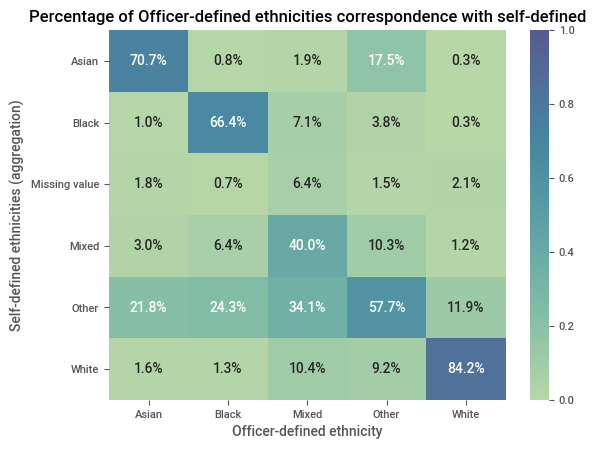

In [32]:
sns.heatmap(oficer_def_ethnicity_vself/oficer_def_ethnicity_vself.sum(), cmap='crest', annot=True, fmt='.1%', vmin=0, vmax=1, alpha=0.8)
plt.title('Percentage of Officer-defined ethnicities correspondence with self-defined')
plt.ylabel('Self-defined ethnicities (aggregation)')
plt.show()

check for gender discrimination

In [33]:
data.Gender.value_counts()

Male      774566
Female     81139
Other        905
Name: Gender, dtype: int64

In [34]:
data[['station', 'positive_outcomes', 'Outcome linked to object of search', 'Gender']]

,station,positive_outcomes,Outcome linked to object of search,Gender
0,hampshire,True,False,Male
1,hampshire,False,False,Male
2,hampshire,False,False,Male
3,hampshire,False,False,Male
4,hampshire,False,False,Male
...,...,...,...,...
856605,northumbria,False,False,Male
856606,northumbria,False,False,Male
856607,northumbria,True,True,Male
856608,northumbria,True,True,Male


In [35]:
data['searched']=True

In [36]:
data['outcome_linked_objective_of_search'] = data['Outcome linked to object of search']

drop gender other from data

In [37]:
data = data[~(data.Gender=='Other')]



In the briefing we were told that "the success rate of the searches should not vary significantly between populations". Is there (A) a defined target for this variation? Also, (B) how should we define population in this case? What would be (C) an acceptable difference between police station search rates? 


    This is a very interesting question. We are not data scientists here at the IT department, so please tell us in your report if our expectation is unreasonable. We would hope that (A) there would 
    
    not be a discrepancy of more than 5 percentage points between population sub-groups, which would be defined as (B) a 
    (station, ethnicity, gender) 
    
    tuple, and that 
    
    the discrepancy between stations (average per station) would not be larger than 10 percentage points.
    
    We have no way to tell whether our expectations are realistic, of course, but trust that you can guide us in this process. Please note that we are only concerned about age when deciding about clothes removal. For now we are not interested in ages when deciding whether or not to conduct a search.


In [38]:
from sklearn.metrics import precision_score

In [39]:
def verify_success_rate_above(y_true, y_pred, min_success_rate=0.1):
    """
    Verifies the success rate on a test set is above a provided minimum
    
    
    """
    
    precision = precision_score(y_true, y_pred, pos_label=True)
    is_satisfied = (precision >= min_success_rate)
    
    return is_satisfied, precision

In [40]:
verify_success_rate_above(data.outcome_linked_objective_of_search, data.searched)

(False, 0.08215214355414541)

In [41]:
def verify_no_discrimination(X_test, y_true, y_pred, sensitive_column='Gender', max_diff=0.05):
    """
    Verifies that no station has discrimination in sensitive_column
    
    
    """
    
    departments = X_test['station'].unique()
    sensitive_classes = X_test[sensitive_column].unique()
    
    is_satisfied = True
    problematic_departments = []
    good_deparments = []
    for department in departments:
        precisions = {}
        for sensitive_class in sensitive_classes:
            mask = (X_test[sensitive_column] == sensitive_class) & (X_test['station'] == department)
            if mask.sum():
                precisions[sensitive_class] = precision_score(y_true[mask], y_pred[mask], pos_label=1, zero_division=0)
                
        diff = np.max(list(precisions.values())) - np.min(list(precisions.values()))
        if diff > max_diff:
            is_satisfied = False
            problematic_departments.append((department, diff, precisions))
        else:
            good_deparments.append((department, diff, precisions))

    return is_satisfied, problematic_departments, good_deparments

In [42]:
verify_no_discrimination(data, data.outcome_linked_objective_of_search, data.searched, sensitive_column='Gender')

(False,
 [('sussex',
   0.05917406331283931,
   {'Male': 0.22084697217675942, 'Female': 0.1616729088639201}),
  ('cumbria',
   0.08372632126166366,
   {'Male': 0.22626025791324736, 'Female': 0.1425339366515837}),
  ('nottinghamshire',
   0.05920555468264835,
   {'Male': 0.23869273416982784, 'Female': 0.1794871794871795}),
  ('surrey',
   0.05651992754691634,
   {'Male': 0.219459224671517, 'Female': 0.16293929712460065}),
  ('dorset',
   0.05691245077017537,
   {'Male': 0.2448474855729596, 'Female': 0.18793503480278423}),
  ('essex',
   0.05257736317612796,
   {'Male': 0.2169961171902577, 'Female': 0.16441875401412973})],
 [('hampshire',
   0.021851064292085887,
   {'Male': 0.2752134779598431, 'Female': 0.2533624136677572}),
  ('south-yorkshire',
   0.039022680499710354,
   {'Male': 0.09177156608663457, 'Female': 0.05274888558692422}),
  ('staffordshire',
   0.028361980440364337,
   {'Male': 0.19724243584833398, 'Female': 0.16888045540796964}),
  ('bedfordshire',
   0.04776492989972514,

In [43]:
verify_no_discrimination(data, data.outcome_linked_objective_of_search, data.searched, sensitive_column='Officer-defined ethnicity')

(False,
 [('staffordshire',
   0.09916785922510205,
   {'White': 0.19199221465313498,
    'Other': 0.10526315789473684,
    'Asian': 0.20443101711983888,
    'Black': 0.20361990950226244}),
  ('cumbria',
   0.06149920255183411,
   {'White': 0.2112280701754386,
    'Other': 0.2727272727272727,
    'Asian': 0.2602739726027397,
    'Black': 0.26666666666666666}),
  ('nottinghamshire',
   0.05782971052109978,
   {'White': 0.2459485224022879,
    'Other': 0.18811881188118812,
    'Asian': 0.2020330368487929,
    'Black': 0.21002132196162046,
    'Mixed': 0.20179372197309417}),
  ('durham',
   0.1767180925666199,
   {'White': 0.2777439024390244,
    'Other': 0.43478260869565216,
    'Asian': 0.30434782608695654,
    'Black': 0.25806451612903225}),
  ('norfolk',
   0.08224009900990098,
   {'White': 0.12786333635304775,
    'Other': 0.09900990099009901,
    'Asian': 0.18125,
    'Black': 0.175054704595186,
    'Mixed': 0.11594202898550725}),
  ('lincolnshire',
   0.06496598639455782,
   {'Whit

In [62]:
def verify_across_stations(X_test, y_true, y_pred, max_diff=0.1, min_success_rate=0.1):
    """
    Verifies that no station has discrimination in sensitive_column
    
    
    """
    
    departments = X_test['station'].unique()

    is_satisfied = True
    problematic_departments = []
    good_deparments = []
    precisions = []
    for department in departments:
        mask = (X_test['station'] == department)
        if mask.sum():
            station_precision = precision_score(y_true[mask], y_pred[mask], pos_label=1, zero_division=0)
            precisions.append(station_precision)

        if station_precision < min_success_rate:
            problematic_departments.append((department, station_precision))
        else:
            good_deparments.append((department, station_precision))

    diff = np.max(precisions) - np.min(precisions)
    if diff > max_diff:
            is_satisfied = False

    return is_satisfied, diff, problematic_departments, good_deparments

In [63]:
across_stations_is_satisfied, across_stations_diff, across_stations_problematic_departments, across_stations_good_deparments = verify_across_stations(data, data.outcome_linked_objective_of_search, data.searched)

In [46]:
data[data.station =='lancashire']['outcome_linked_objective_of_search'].value_counts(dropna=False)

False    15237
Name: outcome_linked_objective_of_search, dtype: int64

In [47]:
data[data.station =='lancashire']['Outcome'].value_counts(dropna=False)

A no further action disposal       12498
Arrest                              1796
Community resolution                 338
Penalty Notice for Disorder          326
Summons / charged by post            143
Khat or Cannabis warning             114
Caution (simple or conditional)       22
Name: Outcome, dtype: int64

In [48]:
data[data.station =='humberside']['outcome_linked_objective_of_search'].value_counts(dropna=False)

False    10305
Name: outcome_linked_objective_of_search, dtype: int64

In [49]:
data[data.station =='humberside']['Outcome'].value_counts(dropna=False)

A no further action disposal       7582
Arrest                             1526
Khat or Cannabis warning            553
Summons / charged by post           327
Community resolution                223
Caution (simple or conditional)      64
Penalty Notice for Disorder          30
Name: Outcome, dtype: int64

In [50]:
data[data.station =='metropolitan']['outcome_linked_objective_of_search'].value_counts(dropna=False)

False    436649
Name: outcome_linked_objective_of_search, dtype: int64

In [51]:
data[data.station =='metropolitan']['Outcome'].value_counts(dropna=False)

A no further action disposal       319496
Arrest                              55708
Community resolution                39654
Penalty Notice for Disorder         15013
Summons / charged by post            6427
Caution (simple or conditional)       351
Name: Outcome, dtype: int64

In [53]:
data_origin[data_origin.station =='lancashire']['Outcome linked to object of search'].value_counts(dropna=False)

NaN    15254
Name: Outcome linked to object of search, dtype: int64

In [55]:
data_origin[data_origin.station =='humberside']['Outcome linked to object of search'].value_counts(dropna=False)

NaN    10306
Name: Outcome linked to object of search, dtype: int64

In [54]:
data_origin[data_origin.station =='metropolitan']['Outcome linked to object of search'].value_counts(dropna=False)

NaN    436867
Name: Outcome linked to object of search, dtype: int64

In [80]:
for problematic_station, problematic_precision_score in across_stations_problematic_departments:
    print('--------------------------------------')
    print('Station: ', problematic_station, ': Precision score', problematic_precision_score)
    print('Ratio of missing data: ', data_origin[data_origin.station==problematic_station]['Outcome linked to object of search'].isna().sum()/len(data_origin[data_origin.station==problematic_station]))

--------------------------------------
Station:  south-yorkshire : Precision score 0.0874485596707819
Ratio of missing data:  0.0
--------------------------------------
Station:  leicestershire : Precision score 0.0006025548324897565
Ratio of missing data:  0.9099783080260304
--------------------------------------
Station:  humberside : Precision score 0.0
Ratio of missing data:  1.0
--------------------------------------
Station:  lincolnshire : Precision score 0.05030821236826407
Ratio of missing data:  0.7174950298210736
--------------------------------------
Station:  lancashire : Precision score 0.0
Ratio of missing data:  1.0
--------------------------------------
Station:  metropolitan : Precision score 0.0
Ratio of missing data:  1.0
--------------------------------------
Station:  dyfed-powys : Precision score 0.034013605442176874
Ratio of missing data:  0.5720470006184292
--------------------------------------
Station:  west-midlands : Precision score 0.013267177219285945
Rat

In [72]:
data_origin[data_origin.station=='metropolitan']['Outcome linked to object of search'].value_counts(dropna=False)

NaN    436867
Name: Outcome linked to object of search, dtype: int64

In [75]:
data_origin['Outcome linked to object of search'].value_counts(dropna=False)

NaN      601927
False    139123
True     115560
Name: Outcome linked to object of search, dtype: int64

Lower precision scores seem to be correlated with missing Outcome linked to object of search values

In [110]:
import matplotlib.ticker as mtick

In [117]:
(data_origin[['Outcome linked to object of search', 'station']]
    .assign(
        is_missing = lambda x: x['Outcome linked to object of search'].isna(), 
        num_data_points = 1
        )
    .groupby('station')
    .sum()
    .assign(ratio_missing = lambda x: x.is_missing/x.num_data_points)
    ['ratio_missing']
    .sort_values(ascending=False)*100)

station
humberside            100.000000
metropolitan          100.000000
lancashire            100.000000
west-midlands          98.241829
leicestershire         90.997831
wiltshire              80.188350
merseyside             79.472551
cleveland              78.879474
dorset                 76.373819
hertfordshire          75.334622
thames-valley          75.143939
bedfordshire           74.034553
north-yorkshire        72.635420
lincolnshire           71.749503
avon-and-somerset      65.926151
nottinghamshire        65.372857
cheshire               64.732197
devon-and-cornwall     63.405465
cambridgeshire         63.112563
dyfed-powys            57.204700
northumbria            32.524272
sussex                 12.629636
staffordshire          11.726961
durham                  5.104603
kent                    3.552448
surrey                  0.464080
suffolk                 0.000000
west-yorkshire          0.000000
btp                     0.000000
west-mercia             0.000000
wa

There's a total of 25 stations with missing data on "Outcome linked to object of search", 20 present a missing data on this column above 50 percent

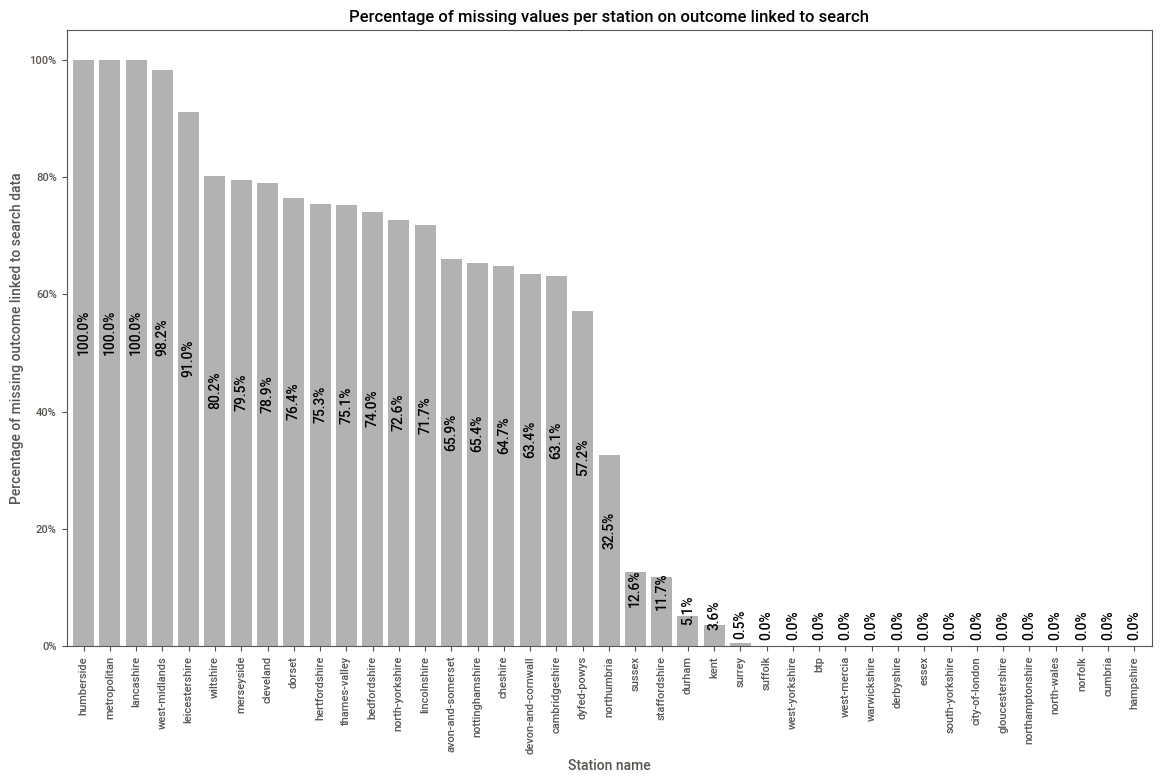

In [141]:
ax =((data_origin[['Outcome linked to object of search', 'station']]
    .assign(
        is_missing = lambda x: x['Outcome linked to object of search'].isna(), 
        num_data_points = 1
        )
    .groupby('station')
    .sum()
    .assign(ratio_missing = lambda x: x.is_missing/x.num_data_points)
    ['ratio_missing']
    .sort_values(ascending=False)*100)
    .plot(kind='bar', color='black', figsize=(14,8), alpha=0.3, width=.8, title='Percentage of missing values per station on outcome linked to search', ylabel='Percentage of missing outcome linked to search data', xlabel='Station name')
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', padding=15, rotation=90)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())